In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('fraud_dataset.csv')

In [3]:
df.head()

,transaction_id,transaction_amount,location,merchant,age,gender,fraud_label
0,1,1000.0,New York,ABC Corp,35,M,0
1,2,500.0,Chicago,XYZ Inc,45,F,0
2,3,2000.0,Los Angeles,ABC Corp,28,M,1
3,4,1500.0,San Francisco,XYZ Inc,30,F,0
4,5,800.0,Chicago,ABC Corp,50,F,0


In [4]:
df['location'].unique()

array(['New York', 'Chicago', 'Los Angeles', 'San Francisco'],
      dtype=object)

In [5]:
from sklearn.preprocessing import OrdinalEncoder

In [6]:
ordinal_encoder=OrdinalEncoder()

In [7]:
loc=df['location'].values.reshape(-1,1)

In [8]:
c = ordinal_encoder.fit_transform(loc)

In [9]:
df['location']=c

In [10]:
df.head()

,transaction_id,transaction_amount,location,merchant,age,gender,fraud_label
0,1,1000.0,2.0,ABC Corp,35,M,0
1,2,500.0,0.0,XYZ Inc,45,F,0
2,3,2000.0,1.0,ABC Corp,28,M,1
3,4,1500.0,3.0,XYZ Inc,30,F,0
4,5,800.0,0.0,ABC Corp,50,F,0


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [12]:
df=df.drop(['merchant'],axis=1)

In [13]:
new_gender=df['gender'].values.reshape(-1,1)

In [14]:
c = ordinal_encoder.fit_transform(new_gender)

In [15]:
df['gender']=c

In [16]:
df.head()

,transaction_id,transaction_amount,location,age,gender,fraud_label
0,1,1000.0,2.0,35,1.0,0
1,2,500.0,0.0,45,0.0,0
2,3,2000.0,1.0,28,1.0,1
3,4,1500.0,3.0,30,0.0,0
4,5,800.0,0.0,50,0.0,0


In [17]:
X=df.drop('fraud_label',axis=1)

In [18]:
y=df['fraud_label']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [21]:
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [61]:
new_value = pd.DataFrame([[5, 20000, 25, 1, 0.2]], columns=X.columns)

In [62]:
prediction = model.predict(new_value)

In [63]:
print(prediction)

[1]


In [47]:
import shap

In [48]:
explainer = shap.Explainer(model)

In [49]:
shap_values = explainer.shap_values(X_test)

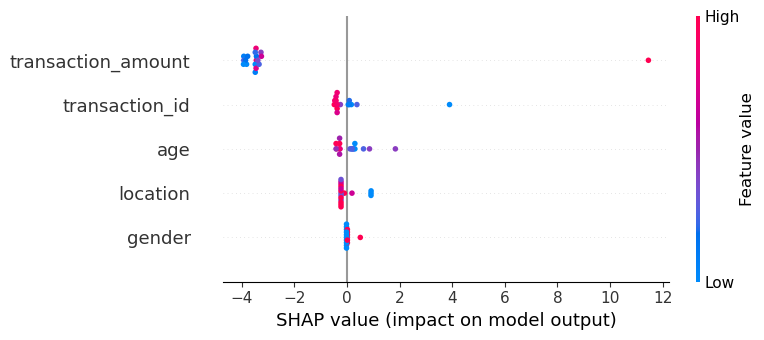

In [50]:
shap.summary_plot(shap_values, X_test)

In [53]:
explanation = explainer(new_value)

In [54]:
print('Explanation:', explanation)

Explanation: .values =
array([[ 9.40952627e-01,  1.12967994e+01, -9.12709503e-02,
        -5.95425875e-01, -1.02901597e-02]])

.base_values =
array([[-4.76972893]])

.data =
array([[5.0e+00, 5.0e+03, 2.5e+01, 1.0e+00, 2.0e-01]])
